In [1]:
import tifffile
from matplotlib import pyplot as plt
import numpy as np
import deeptrack as dt
import random
import tensorflow as tf
import pandas as pd

# Flowspeed, diffusivity, y-position, mean intensity of each track
# Om subtrahera ojämn ljusstyrka från bilderna, prata med elin och viktoria

/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/deeptrack/backend/_config.py:11: UserWarning: cupy not installed. GPU-accelerated simulations will not be possible
  warnings.warn(
/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/deeptrack/backend/_config.py:25: UserWarning: cupy not installed, CPU acceleration not enabled
  warnings.warn("cupy not installed, CPU acceleration not enabled")
2024-03-11 15:40:28.323784: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-11 15:40:28.485787: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 15:40:28.485919: E external/local_xla/x

In [2]:
import tifffile

#tiff_path = r'../data/experimental/Spike_HighDensity.tiff'

tiff_path = r'../../data_from_VE/Experiment-24462.tif'
#csv_path = r'../data/simulated/Sim_MedDensity.csv'

file = tifffile.TiffFile(tiff_path)

n_pages = len(file.pages)
print(n_pages)
pages = file.pages[200:700]
frames = np.array([page.asarray() for page in pages])

frames = frames.astype(np.float32)
print(np.std(frames, axis=(1, 2), keepdims=True).shape)

#frames = frames / frames.max()
frames = frames - frames.mean(axis=(1,2), keepdims=True)
frames = frames / np.std(frames, axis=(1, 2), keepdims=True) / 2

print(frames.min())

1000
(500, 1, 1)
-2.3319168


In [6]:
#gt = gt.drop(['D', 'particle', 'Mass'], axis=1)

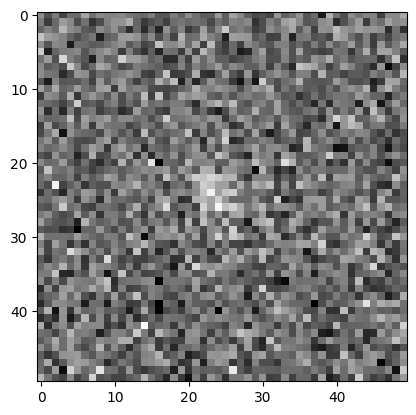

In [3]:
t, x, y, w = (10, 332, 745, 50)
crop0 = frames[t, y:y+w, x:x+w].astype(np.float64)
plt.imshow(crop0, cmap='gray')
#plt.axis("off")

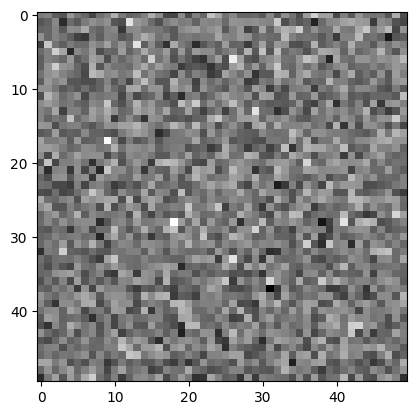

In [48]:
t, x, y, w = (180, 214, 1027, 50)
crop1 = frames[t, y:y+w, x:x+w].astype(np.float64)
plt.imshow(crop1, cmap='gray')
#plt.axis("off")

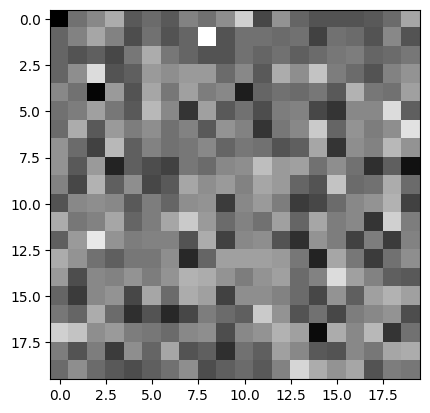

In [9]:
t, x, y, w = (5, 0, 10, 20)
crop2 = frames[t, y:y+w, x:x+w].astype(np.float64)
plt.imshow(crop2, cmap='gray')
#plt.axis("off")

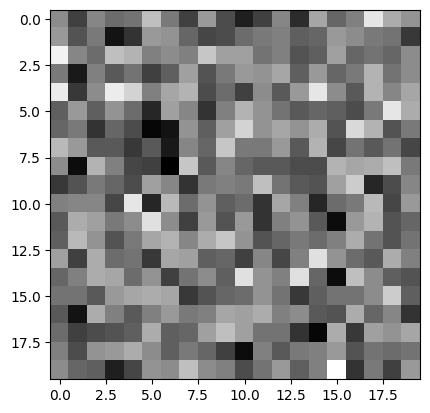

In [10]:
t, x, y, w = (3, 44, 61, 20)
crop3 = frames[t, y:y+w, x:x+w].astype(np.float64)
plt.imshow(crop3, cmap='gray')
#plt.axis("off")

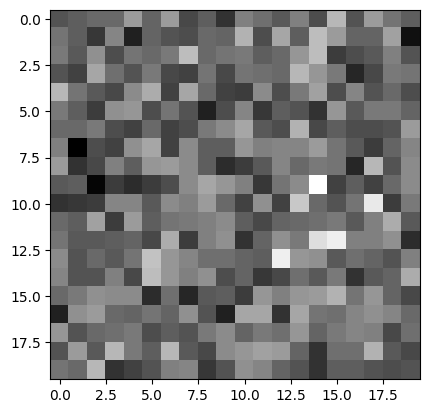

In [11]:
t, x, y, w = (3, 50, 35, 20)
crop4 = frames[t, y:y+w, x:x+w].astype(np.float64)
plt.imshow(crop4, cmap='gray')

## LOADSTAR

In [4]:
#crops = [crop0, crop1, crop2, crop3, crop4]
crops = [crop0]

train_set =   (
    dt.Value(lambda: np.array(random.choice(crops)))   
    >> dt.Affine(translate=lambda:np.random.uniform(-4, 4, 2))
    >> dt.Affine(scale=lambda:np.random.uniform(0.9, 1.2, 2))
    >> dt.Affine(rotate=lambda:np.random.uniform(0, np.pi*2))
    >> dt.Affine(shear=lambda:np.random.uniform(0, 0.6))
    >> dt.Add(lambda: np.random.randn() * 0.1)
    #>> dt.Gaussian(sigma=lambda:np.random.uniform(0, 0.2))  
    #>> dt.Multiply(lambda: np.random.uniform(1.2, 1.2))
)

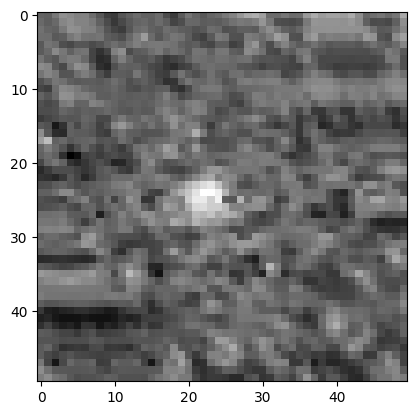

In [5]:
plt.imshow(train_set.resolve(), cmap='gray')

In [6]:
#generator = dt.models.lodestar.LodeSTARGenerator(
#    training_set,
#    3,
#    (group, equivariance), 
#    batch_size=8, 
#    min_data_size=400, 
#    max_data_size=401
#)
name = "size_20_AffineAdd"

loadstar = dt.models.LodeSTAR(input_shape=(None, None, 1))
#loadstar.load_weights(f"../data/weights/loadstar/{name}/{name}")

2024-03-11 15:40:40.684621: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-11 15:40:40.684971: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-11 15:40:40.685070: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [7]:
loadstar.fit(
    train_set,
    epochs=30,
    batch_size=8,
)


Generating 160 / 160 samples before starting training


2024-03-11 15:40:45.943749: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


Epoch 1/30


2024-03-11 15:40:49.977963: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape indropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-03-11 15:40:50.814757: I external/local_xla/xla/service/service.cc:168] XLA service 0x742ad9663df0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-11 15:40:50.814784: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-03-11 15:40:50.832096: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1710168050.923327   36069 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


160/160 [==============================] - 8s 11ms/step - total_loss: 3.2590 - consistency_loss: 1.7400
Epoch 2/30
160/160 [==============================] - 4s 27ms/step - total_loss: 2.2457 - consistency_loss: 0.9879                                        
Epoch 3/30
160/160 [==============================] - 4s 28ms/step - total_loss: 0.2156 - consistency_loss: 0.0676                                        
Epoch 4/30
160/160 [==============================] - 5s 28ms/step - total_loss: 0.1314 - consistency_loss: 0.0445                                        
Epoch 5/30
160/160 [==============================] - 4s 26ms/step - total_loss: 0.1121 - consistency_loss: 0.0287                                        
Epoch 6/30
160/160 [==============================] - 4s 27ms/step - total_loss: 0.1264 - consistency_loss: 0.0321                                        
Epoch 7/30
160/160 [==============================] - 4s 28ms/step - total_loss: 0.1389 - consistency_loss: 0.0406       

In [54]:
#May need to tune these to get optimal performance!
alpha = 0.01
cutoff = 0.999

frame_index = 0
image = frames[:100, :, :]

detections = loadstar.predict_and_detect(image, alpha=alpha, beta=1-alpha, cutoff=cutoff)[0]

#gt_timestep = gt[gt['time'] == frame_index*4+300]

plt.figure(figsize=(15, 15))
plt.imshow(image, cmap='gray')

# WHY IS GT OFSET BY X-22 and Y-20
#plt.scatter(gt_timestep['x']-22, gt_timestep['y']-20, color='b')

plt.scatter(detections[:, 1], detections[:, 0], marker='o', color="r", s=100, facecolors='none')

2024-03-11 15:39:32.355975: W external/local_tsl/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.00GiB (rounded to 6441025536)requested by op lode_star_base_model/sequential/conv2d/Relu
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-03-11 15:39:32.356084: I external/local_tsl/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2024-03-11 15:39:32.356122: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 69, Chunks in use: 69. 17.2KiB allocated for chunks. 17.2KiB in use in bin. 6.2KiB client-requested in use in bin.
2024-03-11 15:39:32.356145: I external/local_tsl/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 3, Chunks in use: 3. 2.2KiB allocated for chunks. 2.2KiB in use in bin. 2.2KiB client-requested in use

ResourceExhaustedError: Graph execution error:

Detected at node lode_star_base_model/sequential/conv2d/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 542, in dispatch_queue

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 531, in process_one

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 775, in execute_request

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipykernel_30214/298926656.py", line 8, in <module>

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/deeptrack/models/lodestar/models.py", line 303, in predict_and_detect

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2655, in predict

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/deeptrack/models/lodestar/models.py", line 148, in call

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/activations.py", line 306, in relu

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/backend.py", line 5395, in relu

OOM when allocating tensor with shape[32,1254,1254,32] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node lode_star_base_model/sequential/conv2d/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_50476]

1/1 [==============================] - 0s 24ms/step


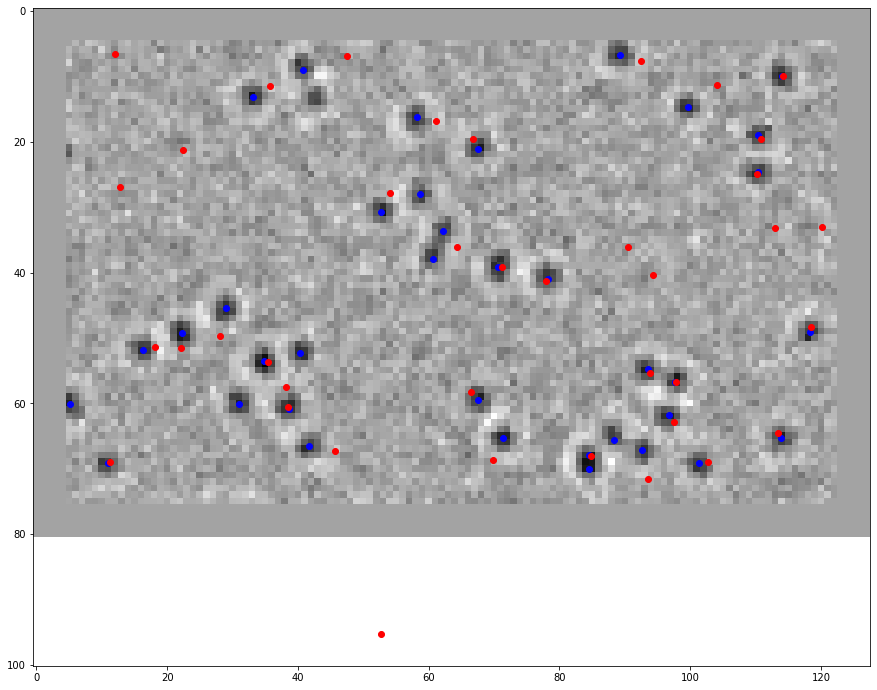

In [ ]:
#May need to tune these to get optimal performance!
alpha = 0.99
cutoff = 0.9

frame_index = 3
image = frames[frame_index, :, :]



detections = loadstar.predict_and_detect(image[np.newaxis], alpha=alpha, beta=1-alpha, cutoff=cutoff)[0]

gt_timestep = gt[gt['time'] == frame_index*1+300][['y', 'x']].to_numpy()
gt_timestep[:, 1] -= 22
gt_timestep[:, 0] -= 20

detections = np.delete(detections, np.where((detections[:, 0] < 5) | (detections[:, 1] < 5 | (detections[:, 1] > 123) | (detections[:, 0] > 75)))[0], axis=0)
gt_timestep = np.delete(gt_timestep, np.where((gt_timestep[:, 0] < 5) | (gt_timestep[:, 1] < 5) | (gt_timestep[:, 1] > 123) | (gt_timestep[:, 0] > 75))[0], axis=0)

plt.figure(figsize=(15, 15))

display_image = image.copy()

display_image[:5, :] = 0
display_image[-5:, :] = 0
display_image[:, :5] = 0
display_image[:, -5:] = 0

plt.imshow(display_image, cmap='gray')
# WHY IS GT OFSET BY X-22 and Y-20??
plt.scatter(gt_timestep[:, 1], gt_timestep[:, 0], color='b')
plt.scatter(detections[:, 1], detections[:, 0], color="r")

In [11]:
alpha = 0.99
cutoff = 0.9

detections_all = loadstar.predict_and_detect(frames[:5, :, :], alpha=alpha, beta=1-alpha, cutoff=cutoff, mode="quantile")

print(len(detections_all))

2024-03-11 15:44:11.865650: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1005.78MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-11 15:44:11.865694: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1005.78MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-11 15:44:11.865707: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1005.78MiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-03-11 15:44:11.885693: W external/local_tsl/tsl/frame

ResourceExhaustedError: Graph execution error:

Detected at node lode_star_base_model/sequential/conv2d_1/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/traitlets/config/application.py", line 1075, in launch_instance

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 739, in start

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 542, in dispatch_queue

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 531, in process_one

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 359, in execute_request

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 775, in execute_request

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 446, in do_execute

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 549, in run_cell

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3051, in run_cell

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3106, in _run_cell

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3311, in run_cell_async

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3493, in run_ast_nodes

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "/tmp/ipykernel_35856/3767371856.py", line 4, in <module>

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/deeptrack/models/lodestar/models.py", line 303, in predict_and_detect

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2655, in predict

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2440, in predict_function

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2425, in step_function

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2413, in run_step

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2381, in predict_step

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/deeptrack/models/lodestar/models.py", line 148, in call

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 590, in __call__

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/sequential.py", line 398, in call

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/activations.py", line 306, in relu

  File "/home/gideon/Documents/PhD/Projects/KAW/.venv/lib/python3.11/site-packages/keras/src/backend.py", line 5395, in relu

OOM when allocating tensor with shape[5,32,1254,1254] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node lode_star_base_model/sequential/conv2d_1/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_50670]

In [8]:
name = "loadstar_new"

loadstar.save_weights(f"../weights/loadstar/{name}/{name}")


### TEST

In [9]:
def distance_matrix(matrix_a, matrix_b):
    expanded_a = np.expand_dims(matrix_a, 1)  # Shape: (n, 1, m)
    expanded_b = np.expand_dims(matrix_b, 0)  # Shape: (1, n, m)
    #expanded_a = np.transpose(expanded_a, (0, 1, 2))
    square_difference = np.square(
        expanded_a - expanded_b
    )  # Element-wise squared difference
    distances = np.sum(square_difference, axis=2)
    distances = np.sqrt(distances)
    return distances

mses = []
missed_detections_total = 0
false_detections_total = 0
true_detections_total = 0
for frame_index in range(len(detections_all)):

    detections = detections_all[frame_index]
    gt_timestep = gt[gt['time'] == frame_index*1+300][['y', 'x']].to_numpy()
    gt_timestep[:, 1] -= 22
    gt_timestep[:, 0] -= 20

    detections = np.delete(detections, np.where((detections[:, 0] < 5) | (detections[:, 1] < 5 | (detections[:, 1] > 123) | (detections[:, 0] > 75)))[0], axis=0)
    gt_timestep = np.delete(gt_timestep, np.where((gt_timestep[:, 0] < 5) | (gt_timestep[:, 1] < 5) | (gt_timestep[:, 1] > 123) | (gt_timestep[:, 0] > 75))[0], axis=0)

    distances = distance_matrix(detections, gt_timestep)
    min_distance = np.argmin(distances, axis=0)
    min_distance_2 = np.argmin(distances, axis=1)

    tps = []
    missed_detections = 0
    false_detections = 0
    true_detections = 0
    for i_dist, dist_1 in enumerate(min_distance):
        if i_dist == min_distance_2[dist_1]:
            tps.append(i_dist)
        else:
            missed_detections += 1

    for i_dist, dist_2 in enumerate(min_distance_2):
        if i_dist == min_distance[dist_2]:
            true_detections += 1
        else:
            false_detections += 1

    
    true_detections_total += true_detections
    false_detections_total += false_detections
    missed_detections_total += missed_detections

    se = np.min(distances, axis=0)[tps]
    mses.append(np.mean(se))

    #plt.figure(figsize=(15, 15))
    #plt.imshow(images[frame_index], cmap='gray')
    #plt.scatter(gt_timestep[:, 1], gt_timestep[:, 0], color='b')
    #plt.scatter(detections[:, 1], detections[:, 0], color="r")
    #plt.scatter(gt_timestep[tps, 1], gt_timestep[tps, 0], color='y')

    #break

print(true_detections_total)
print(false_detections_total)
print(missed_detections_total)

print()

print(false_detections_total / (false_detections_total + true_detections_total))
print(missed_detections_total / (missed_detections_total + true_detections_total))

print(np.mean(mses))




NameError: name 'detections_all' is not defined